## Data Preparation



In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
instacart = pd.read_csv("/datasets/instacart_orders.csv", sep= ";")
products = pd.read_csv("/datasets/products.csv", sep= ";")
aisles = pd.read_csv("/datasets/aisles.csv", sep= ";")
departs = pd.read_csv("/datasets/departments.csv", sep= ";")
ord_products = pd.read_csv("/datasets/order_products.csv", sep= ";")

In [3]:
# mostrar información del DataFrame
instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
departs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
ord_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Data Preprocessing

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(instacart.duplicated().sum())

15


In [ ]:
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(instacart[(instacart["order_hour_of_day"] == 2) & (instacart["days_since_prior_order"] == 3)])        

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
1260     2537018     7543            23          1                  2   
13433     905885   128625            23          0                  2   
15807     330724   189748             7          6                  2   
45762    2604454   122001             3          4                  2   
59335    2281153   114918             2          0                  2   
67723    1056967   132276            33          1                  2   
105730    249470    32746            25          5                  2   
120815   2438538   124608            12          3                  2   
120999   2535723    83954            42          4                  2   
137723   1150393   126112             7          5                  2   
142222   1804388    45639             2          4                  2   
171282    622015   111941            66          6                  2   
175078   3119109     8510             9          0 

In [10]:
# Elimina los pedidos duplicados
instacart.drop_duplicates(inplace= True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(instacart.duplicated().sum())

0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(instacart["order_id"].duplicated().sum())        

0


### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())

0


In [14]:
# Revisa únicamente si hay ID de productos duplicados
print(products["product_id"].duplicated().sum())

0


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print(products["product_name"].str.upper().duplicated().sum())  #Esto da 1361 dups 

1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
print(products[products["product_name"].notna()]["product_name"].str.upper().duplicated().sum()) #Esto da 104 dups aun.

products["product_name_upper"] = products["product_name"].str.upper()   #Creo otra columna para filtrar los valores duplicados para ignorar mayus y mins
products = products.drop_duplicates(subset=["product_name_upper"], keep='first')  #Elimino dups y conservo la primera mencion.
products = products.drop(columns=["product_name_upper"]) #Elimino la columna que ya no contiene dups, y mi columna product_name ya esta sobreescrita 

104


### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(departs.duplicated().sum())

0


In [18]:
# Revisa únicamente si hay IDs duplicadas de departamentos
print(departs["department_id"].duplicated().sum())

0


### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum())

0


### `order_products` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
print(ord_products.duplicated().sum())

0


In [21]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(ord_products.duplicated(subset= ["order_id", "product_id", "add_to_cart_order", "reordered"]).sum())

0


### `products` data frame

In [22]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products["product_name"].isna().sum())

1


In [23]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(products[products["aisle_id"] == 100]["product_name"].isna().sum())

1


In [24]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(products[products["department_id"] == 21]["product_name"].isna().sum())

1


In [25]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(products[(products["aisle_id"] == 100) & (products["department_id"] == 21)])

    product_id product_name  aisle_id  department_id
37          38          NaN       100             21


In [26]:
# Reemplaza todos los nombres de los productos por "Unknown".
products["product_name"].fillna("Unknown", inplace= True)

### `orders` data frame

In [27]:
# Encuentra los valores ausentes
print(instacart.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [28]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(instacart[instacart["order_id"].isna()])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


### `order_products` data frame

In [29]:
# Encuentra los valores ausentes
print(ord_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [30]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(ord_products["add_to_cart_order"].min())
print(ord_products["add_to_cart_order"].max())

1.0
64.0


In [31]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ids_con_nan = ord_products[ord_products["add_to_cart_order"].isna()]["order_id"]

print(ids_con_nan)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [32]:

# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

print(instacart[instacart["order_id"].isna() > 64])
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
print(instacart[instacart.isna()].groupby(by= "order_id")["order_id"].head(5))
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
df_plus = ord_products.merge(instacart, on= "order_id", how= "outer")
group = df_plus.groupby(by= "order_id")["product_id"].count().head(5)
print(group)  # Numero de "product_id" en cada pedido.
print(group.min())  #Valor minimo del conteo.

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: order_id, dtype: float64
order_id
4     13
9     15
11     5
19     3
20     8
Name: product_id, dtype: int64
3


In [33]:
# Código del revisor
ord_products[ord_products['order_id'].isin(ids_con_nan)].groupby('order_id')['product_id'].count().min()

65

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
ord_products["add_to_cart_order"].fillna("999", inplace= True)
ord_products["add_to_cart_order"] = ord_products["add_to_cart_order"].astype("int")

## Data Analysis

In [35]:
df_hours_min = instacart["order_hour_of_day"].min()
df_hours_max = instacart["order_hour_of_day"].max()
print(f"La columna 'order_hour_of_day' oscila entre {df_hours_min} y {df_hours_max}.")

La columna 'order_hour_of_day' oscila entre 0 y 23.


In [36]:
df_dow_min = instacart["order_dow"].min()
df_dow_max = instacart["order_dow"].max()
print(f"La columna 'order_dow' oscila entre {df_dow_min} y {df_dow_max}.")

La columna 'order_dow' oscila entre 0 y 6.


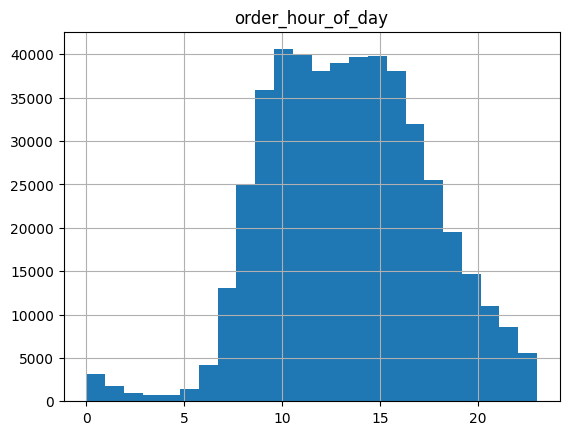

In [37]:
instacart.hist(
    column= "order_hour_of_day",
    bins= 24,
)
plt.show()

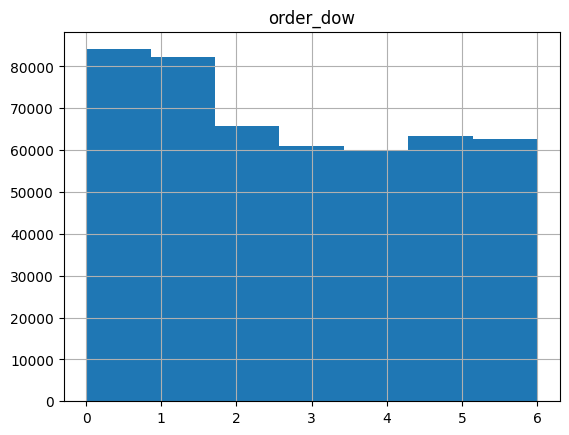

In [38]:
instacart.hist(
    column= "order_dow",
    bins= 7
)
plt.show()

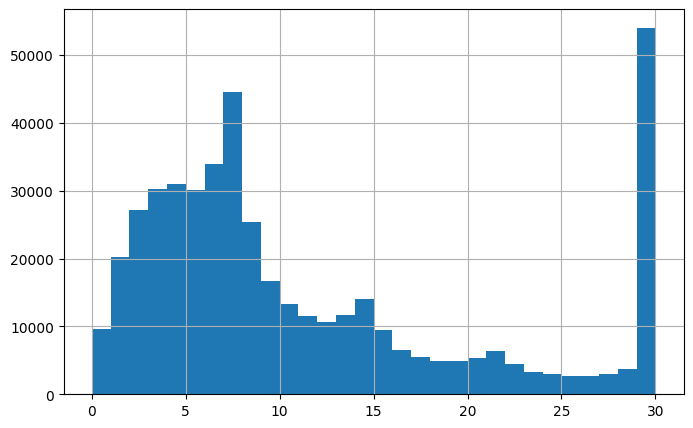

In [39]:
instacart["days_since_prior_order"].hist(
    bins= 30,
    figsize= (8, 5)
)
plt.show()

In [40]:
# Valores Min y Max

print(f"Los valores que podemos identificar como el minimo son {instacart['days_since_prior_order'].min()} y el maximo como {instacart['days_since_prior_order'].max()}")

Los valores que podemos identificar como el minimo son 0.0 y el maximo como 30.0


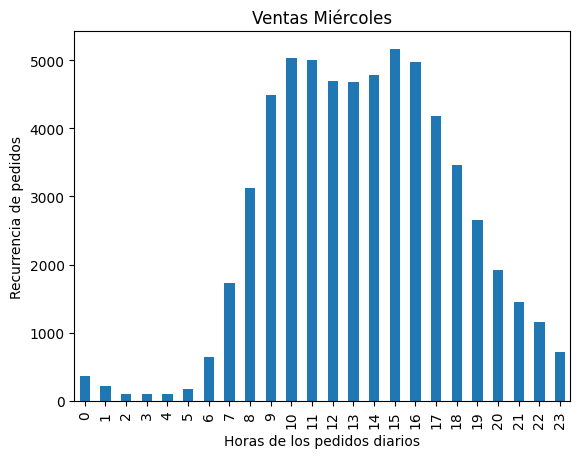

In [41]:
df_miercoles = instacart[instacart["order_dow"] == 3]
pedidos_por_hora = df_miercoles.groupby("order_hour_of_day")["order_number"].count()
pedidos_por_hora.plot(
    kind="bar",
    title="Ventas Miércoles",
    xlabel= "Horas de los pedidos diarios",
    ylabel= "Recurrencia de pedidos"
)
plt.show()

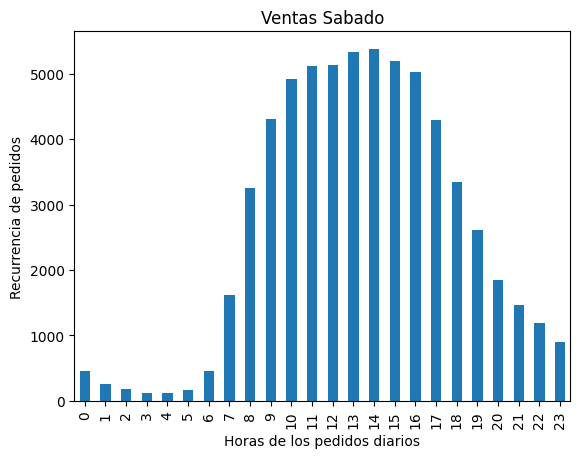

In [42]:
df_sabado = instacart[instacart["order_dow"] == 6]
pedidos_por_hora = df_sabado.groupby("order_hour_of_day")["order_number"].count()
pedidos_por_hora.plot(
    kind= "bar",
    title= "Ventas Sabado",
    xlabel= "Horas de los pedidos diarios",
    ylabel= "Recurrencia de pedidos"
)
plt.show()


* Respuesta: Tanto para los dias sabado como para los miercoles se encuentran actividades similares, donde la unica diferencia es que en el dia sabado las ventas entre las 11 y las 15 horas hay mucho mas movimiento que en el dia miercoles.
  

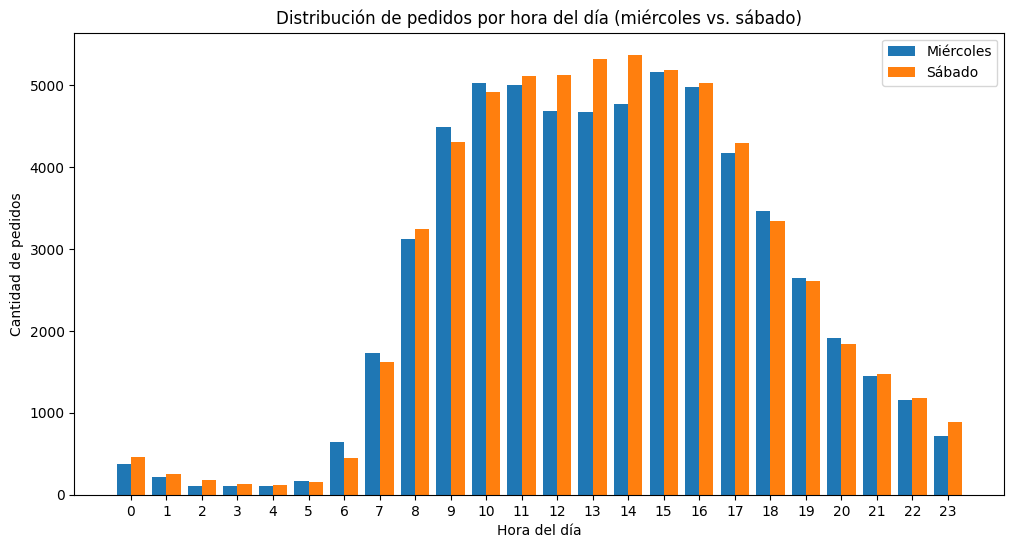

In [44]:
wednesday_counts = df_miercoles['order_hour_of_day'].value_counts().sort_index()
saturday_counts = df_sabado['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(wednesday_counts.index - 0.2, wednesday_counts.values, width=0.4, label='Miércoles')
plt.bar(saturday_counts.index + 0.2, saturday_counts.values, width=0.4, label='Sábado')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de pedidos')
plt.title('Distribución de pedidos por hora del día (miércoles vs. sábado)')
plt.xticks(range(24))
plt.legend()
plt.show()

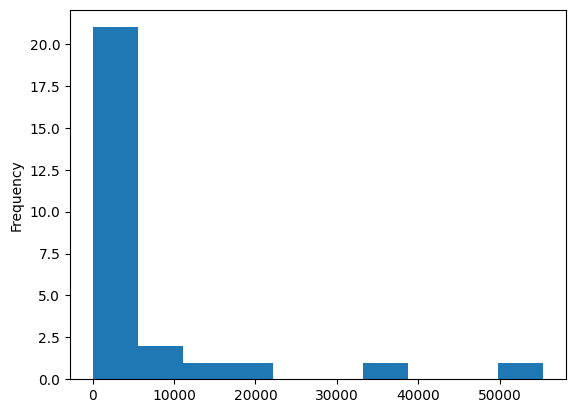

In [45]:
df_filtro = instacart.groupby(by= "user_id")["order_number"].count()
df_filtro.value_counts().plot(
    kind='hist'
)
plt.show()


In [35]:
top_20_productos = ord_products["product_id"].value_counts().head(20)
top_20_productos = top_20_productos.reset_index()
top_20_productos.columns = ["product_id", "reorder_num"]
top_20_reordenados = top_20_productos.merge(products[["product_id", "product_name"]], on= "product_id", how= "left")
print(top_20_reordenados.head(10))

   product_id  reorder_num            product_name
0       24852        66050                  Banana
1       13176        53297  Bag of Organic Bananas
2       21137        37039    Organic Strawberries
3       21903        33971    Organic Baby Spinach
4       47209        29773    Organic Hass Avocado
5       47766        24689         Organic Avocado
6       47626        21495             Large Lemon
7       16797        20018            Strawberries
8       26209        19690                   Limes
9       27845        19600      Organic Whole Milk


<AxesSubplot:ylabel='product_name'>

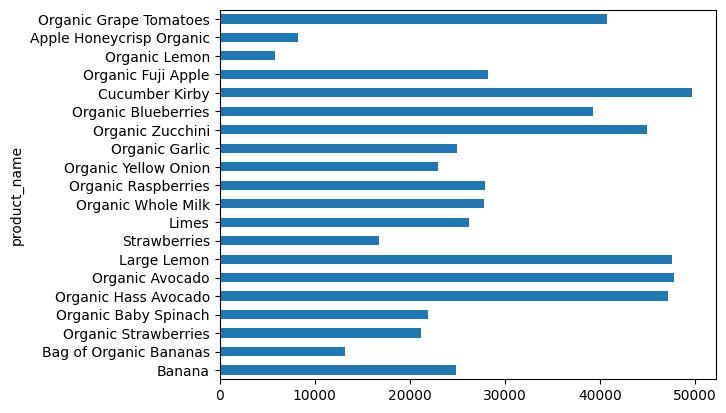

In [36]:
top_20_reordenados.plot(
    kind= "barh",
    x= "product_name",
    y= "product_id",
    legend= False
)

In [48]:
# Código del revisor
productos_reordenados_counts = ord_products['product_id'].value_counts().head(20)

top_20_reordenados = productos_reordenados_counts.reset_index()

top_20_reordenados.columns = ['product_id', 'reorder_count']

top_20_reordenados = top_20_reordenados.merge(products[['product_id', 'product_name']], on='product_id', how='left')

print(top_20_reordenados[['product_id', 'product_name', 'reorder_count']])

## GRACIAS POR EL CODIGO DE REFERENCIA, LO ESTUDIE Y ENTENDI, AL FINAL LO APLIQUE Y SIRVIO, MUY AGRADECIDO :)

    product_id              product_name  reorder_count
0        24852                    Banana          66050
1        13176    Bag of Organic Bananas          53297
2        21137      Organic Strawberries          37039
3        21903      Organic Baby Spinach          33971
4        47209      Organic Hass Avocado          29773
5        47766           Organic Avocado          24689
6        47626               Large Lemon          21495
7        16797              Strawberries          20018
8        26209                     Limes          19690
9        27845        Organic Whole Milk          19600
10       27966       Organic Raspberries          19197
11       22935      Organic Yellow Onion          15898
12       24964            Organic Garlic          15292
13       45007          Organic Zucchini          14584
14       39275       Organic Blueberries          13879
15       49683            Cucumber Kirby          13675
16       28204        Organic Fuji Apple        

In [49]:
grp_df = df_plus.groupby(by= "user_id")["product_id"].value_counts()

<AxesSubplot:ylabel='Frequency'>

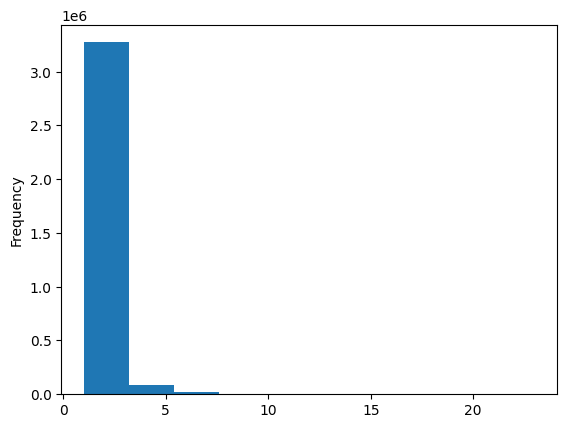

In [50]:
grp_df.plot(kind= "hist")

In [37]:
top_20_reordenados2 = top_20_reordenados.merge(ord_products[["product_id", "reordered"]],on="product_id", how="left")
top_20_grp = top_20_reordenados2[top_20_reordenados2["reordered"] == 1].groupby(by= "product_name")["reordered"].count()
print(top_20_grp)

product_name
Apple Honeycrisp Organic     8836
Bag of Organic Bananas      44450
Banana                      55763
Cucumber Kirby               9538
Large Lemon                 15044
Limes                       13327
Organic Avocado             18743
Organic Baby Spinach        26233
Organic Blueberries          8799
Organic Fuji Apple           8989
Organic Garlic              10411
Organic Grape Tomatoes       7793
Organic Hass Avocado        23629
Organic Lemon                8412
Organic Raspberries         14748
Organic Strawberries        28639
Organic Whole Milk          16251
Organic Yellow Onion        11145
Organic Zucchini            10076
Strawberries                13945
Name: reordered, dtype: int64


<AxesSubplot:ylabel='product_name'>

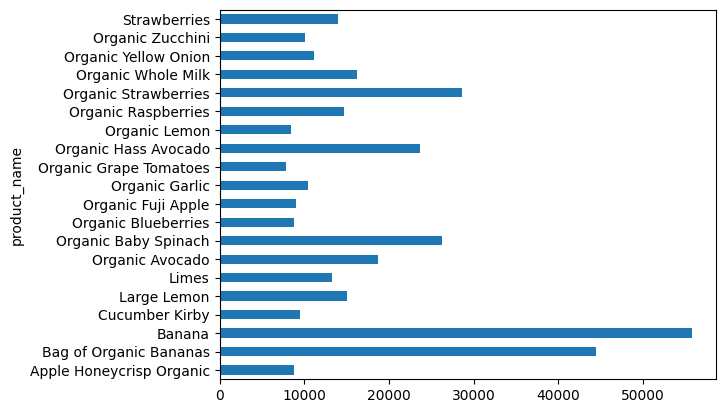

In [38]:
top_20_grp.plot(
    kind= "barh",
    x= "product_name",
    y= "reordered"
)

Escribe aquí tus conclusiones
* Los productos que mas vuelven a pedirse en una orden llegan a ser "Banana" y "Bag of Organic Bananas"

In [53]:
product_num = df_plus.groupby(by= "product_id").size()

In [54]:
reorder = df_plus[df_plus["reordered"] == 1].groupby(by= "product_id").size()

<AxesSubplot:>

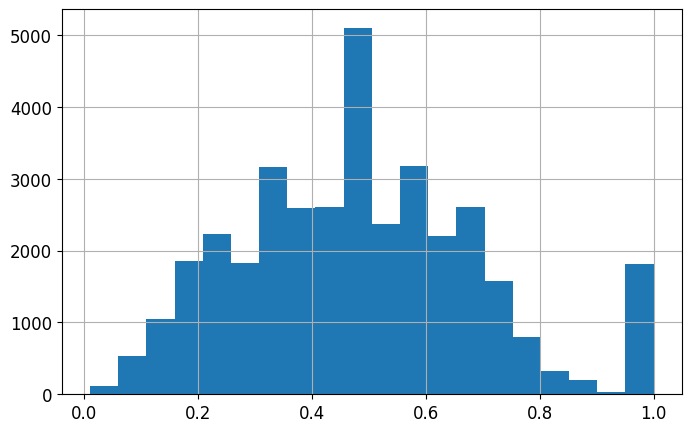

In [55]:
prop_product = reorder/product_num

prop_product.hist(
    bins= 20,
    figsize= (8,5),
    xlabelsize = 12,
    ylabelsize = 12
)

Escribe aquí tus conclusiones
* En general, la mayoría de los productos tienen una proporción moderada de reorden (entre 30% y 60%), lo que sugiere que no todos los productos se vuelven a pedir con frecuencia, pero tampoco es raro que algunos se repitan.

In [56]:
user_num = df_plus.groupby(by= "user_id").size()
user_reorder = df_plus[df_plus["reordered"] == 1].groupby(by= "user_id").size()
user_prop = user_reorder/user_num

<AxesSubplot:>

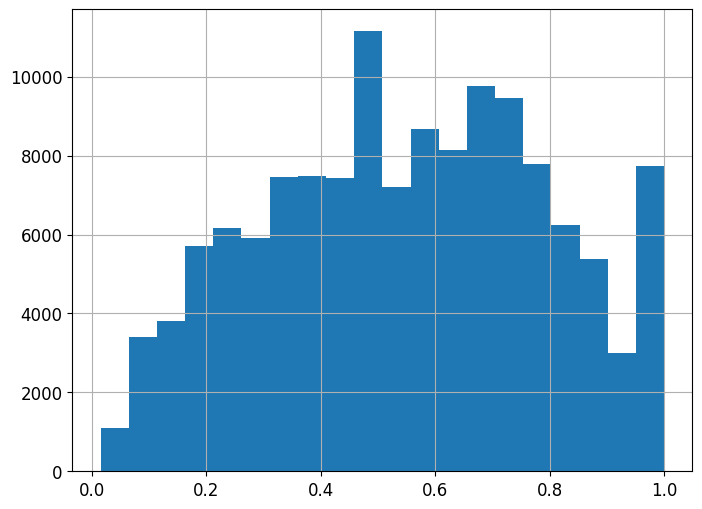

In [57]:
user_prop.hist(
    bins= 20,
    figsize= (8, 6),
    xlabelsize= 12,
    ylabelsize= 12
)

Escribe aquí tus conclusiones
* Respuesta: La mayoría de los clientes tiende a repetir una parte importante de los productos que compran.
La distribución está centrada entre 0.3 y 0.7, lo que indica que muchos usuarios reordenan entre el 30% y el 70% de sus productos.

In [61]:
top_20_reordenados3 = top_20_reordenados.merge(ord_products[["product_id", "add_to_cart_order"]], on= "product_id", how= "left")
top_20_grp2 = top_20_reordenados3[top_20_reordenados3["add_to_cart_order"] == 1].groupby(by= "product_name")["add_to_cart_order"].count()

<AxesSubplot:ylabel='product_name'>

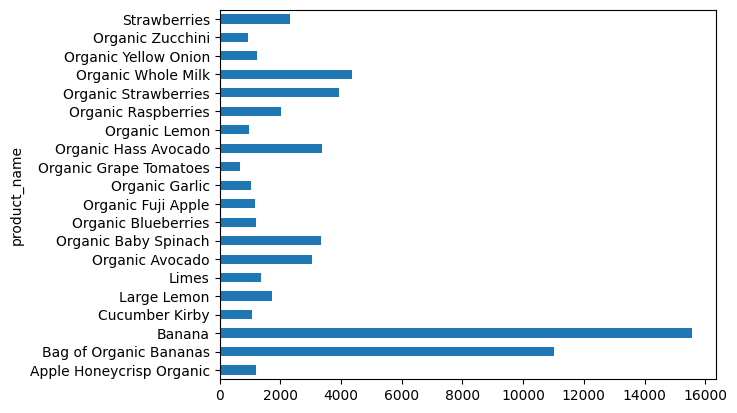

In [62]:
top_20_grp2.plot(
    kind= "barh",
    x= "product_name",
    y= "add_to_cart_order"
)

Escribe aquí tus conclusiones
* Respuesta: Las "Bananas" y "Bag Organic Bananas" tambien demuestran ser los primeros productos en ser puestos en los carritos

### Conclusion general del proyecto:

Este proyecto tuvo como objetivo analizar el comportamiento de compra de los usuarios en Instacart, una plataforma de entrega de comestibles en línea, a través de un conjunto de datos público proporcionado para una competencia de Kaggle en 2017. A través de un análisis exploratorio de datos (EDA), se identificaron patrones de consumo, productos más populares y tendencias en los hábitos de compra de los usuarios.

**Comportamiento Temporal**

Los análisis temporales revelaron que la mayoría de los pedidos se realizan entre las 10:00 a.m. y las 3:00 p.m., indicando una alta actividad durante las horas medias del día. En cuanto a los días de la semana, se observó que domingo y lunes son los días más comunes para realizar compras, posiblemente relacionados con la planificación semanal del hogar.

Además, si bien no se pudo determinar con exactitud cada cuánto tiempo los usuarios hacen pedidos, se identificaron dos picos recurrentes: uno a los 7 días y otro a los 30 días, lo que sugiere una combinación de usuarios con hábitos de compra semanal y mensual.

**Comparativa entre días específicos**

Una comparación entre los días miércoles y sábado mostró comportamientos similares en cuanto a la distribución de pedidos por hora. Sin embargo, los sábados entre las 11:00 y las 15:00 registran un mayor volumen de pedidos, reflejando un incremento en la actividad posiblemente asociado al tiempo libre de los fines de semana.

**Hábitos de compra y productos**

En promedio, cada cliente compra alrededor de 3 artículos por pedido, aunque en algunos casos este número se eleva hasta los 10 artículos, lo que indica una variabilidad en la cantidad de productos adquiridos por usuario.

Entre los productos, destacan algunos por su alta popularidad y frecuencia de reordenamiento. En particular:

"Cucumber Kirby" fue identificado como el producto más popular en general.

"Banana" y "Bag of Organic Bananas" no solo son los productos más reordenados, sino también los más frecuentemente agregados primero al carrito, lo cual sugiere un fuerte hábito de compra y prioridad de consumo entre los usuarios.

En cuanto a la proporción de reorden por producto, la mayoría se encuentra entre el 30% y el 60%, lo que indica una tendencia moderada a repetir compras, aunque algunos productos claramente destacan por su recurrencia. Del mismo modo, al analizar el comportamiento a nivel de cliente, se encontró que la proporción de productos ya comprados que vuelven a ser pedidos se centra en un rango de 30% a 70%, lo cual refuerza la idea de que muchos consumidores tienen hábitos de compra consistentes y tienden a mantenerlos.